In [1]:
import torch
import matplotlib.pyplot as plt

# Heterogenous v.s. uniform data distributions

Text(0, 0.5, 'Validation Accuracy')

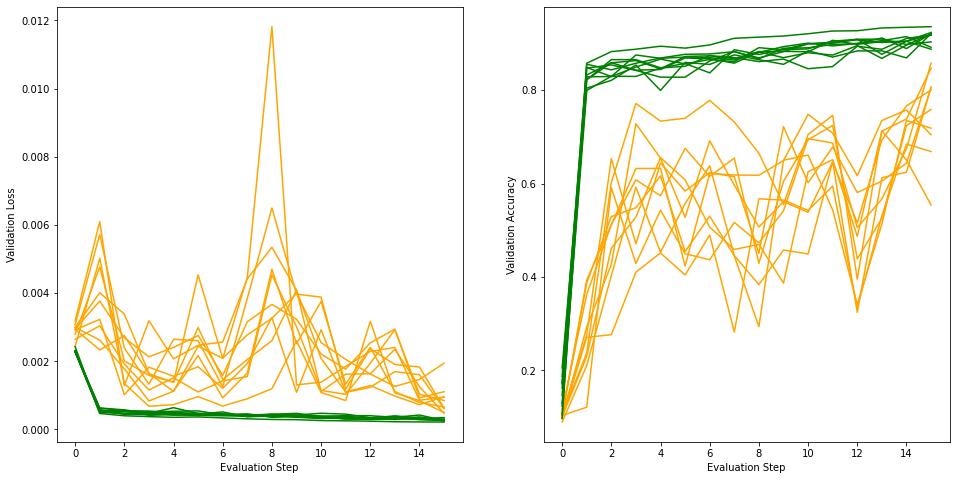

In [18]:
data_dict = torch.load("outputs/hetero_600_5.pt")
obvs_h = data_dict["obj_vals"]
accs_h = data_dict["accuracy"]

data_dict = torch.load("outputs/uniform_600_5.pt")
obvs_u = data_dict["obj_vals"]
accs_u = data_dict["accuracy"]


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax0.plot(obvs_h, c="orange")
ax0.plot(obvs_u, c="green")

ax0.set_xlabel("Evaluation Step")
ax0.set_ylabel("Validation Loss")
ax1.plot(accs_h, c="orange")
ax1.plot(accs_u, c="green")
ax1.set_xlabel("Evaluation Step")
ax1.set_ylabel("Validation Accuracy")

# Experiment Parameters

- BatchSize = 64
- InnerIterations = 5 (the number of gradient descent iterations for the primal update)
- OuterIterations = 600 (the number of communication rounds per run)
- Rho = 1.0
- GDLearningRate = 0.005 (in this case we use Adam)
- GraphType = Wheel

# Observations

- Images processed per node: BatchSize x InnerIterations x OuterIterations = 64 x 5 x 600 = 192,000. This equates to roughly 3.2 passes on the entire dataset of 60,000 images.
- The CNN in use has 37,682 parameters, which equates to roughly 150kb messages.
- For reference, after 1 pass through the dataset when training in the centralized case the model achieves 97% evaluation accuracy.

# Potentially Interesting Questions
- How does scale effect the convergence? Since this is a *small* CNN.
- Can we quantify the data heterogeneity? What does this mean for the gradients? Maybe a first-order gradient tracking DO method is better?

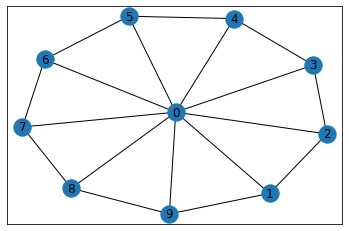

In [21]:
import networkx as nx
nx.draw_networkx(nx.wheel_graph(10))

In [23]:
28 * 28 * 6000 / 37000


127.13513513513513